<a href="https://colab.research.google.com/github/AbdullahAlshamrani0/IDS/blob/main/H.W5/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5

In [ ]:
import pandas as pd

#Loading the dataset
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


In [ ]:
#Test for presence any missing attribute/target values and impute as necessary.
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# impute as necessary
data = data.dropna()

#Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)
from sklearn.preprocessing import LabelEncoder
#fit_transfer
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(wine_data['Type'])
data['Alcohol_flag'] = label_encoder.fit_transform(wine_data['Alcohol_flag'])
data['Sugar_flag'] = label_encoder.fit_transform(wine_data['Sugar_flag'])

# Display the updated dataset
data.head()


Missing Values:
Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1


Contingency Table: Type vs. Alcohol Content
Alcohol_flag     0     1  Total
Type                           
0              485   600   1085
1             1176  1084   2260
Total         1661  1684   3345


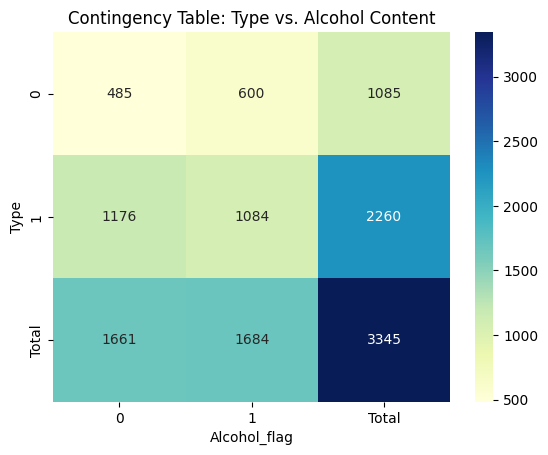

Contingency Table: Type vs. Sugar Content
Sugar_flag     0     1  Total
Type                         
0            237   848   1085
1           1382   878   2260
Total       1619  1726   3345


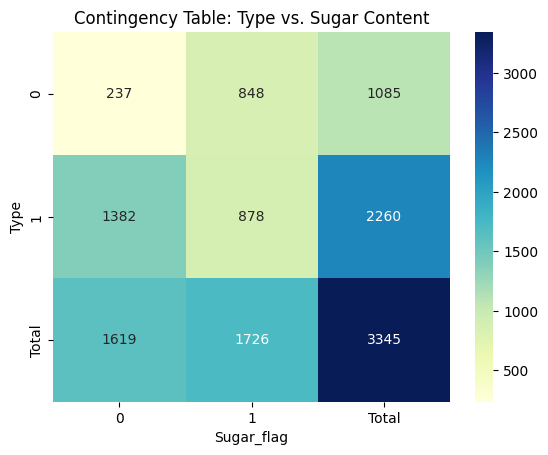

In [ ]:

#Create contingency tables (cross tabulations) for:
#a. Type vs. alcohol content
#b. Type vs. Sugar content

import seaborn as sns
import matplotlib.pyplot as plt

# a. Type vs. alcohol content
table_alcohol = pd.crosstab(data['Type'], data['Alcohol_flag'], margins=True, margins_name="Total")
print("Contingency Table: Type vs. Alcohol Content")
print(table_alcohol)

# Plot the contingency table
sns.heatmap(table_alcohol, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Contingency Table: Type vs. Alcohol Content")
plt.show()

# b. Type vs. Sugar content
table_sugar = pd.crosstab(data['Type'], data['Sugar_flag'], margins=True, margins_name="Total")
print("Contingency Table: Type vs. Sugar Content")
print(table_sugar)

# Plot the contingency table
sns.heatmap(table_sugar, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Contingency Table: Type vs. Sugar Content")
plt.show()


In [ ]:
#Use the tables from the previous step to calculate:
#a. The prior probability of Type = Red and Type = White.
#b. The probability of high and low alcohol content.
#c. The probability of high and low sugar content.
#d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
#e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

# The prior probability of Type = Red and Type = White
prior_red = table_alcohol.loc[0, 'Total'] / table_alcohol.loc['Total', 'Total']
prior_white = table_alcohol.loc[1, 'Total'] / table_alcohol.loc['Total', 'Total']
print(f"Prior Probability of Type = Red: {prior_red:.2f}")
print(f"Prior Probability of Type = White: {prior_white:.2f}")

# Probability of high and low alcohol content
prob_high_alcohol = table_alcohol.loc['Total', 0] / table_alcohol.loc['Total', 0]
prob_low_alcohol = table_alcohol.loc['Total', 1] / table_alcohol.loc['Total', 'Total']
print(f"Probability of High Alcohol Content: {prob_high_alcohol:.2f}")
print(f"Probability of Low Alcohol Content: {prob_low_alcohol:.2f}")

# Probability of high and low sugar content
prob_high_sugar = table_sugar.loc['Total', 0] / table_sugar.loc['Total', 'Total']
prob_low_sugar = table_sugar.loc['Total', 1] / table_sugar.loc['Total', 'Total']
print(f"Probability of High Sugar Content: {prob_high_sugar:.2f}")
print(f"Probability of Low Sugar Content: {prob_low_sugar:.2f}")

# Conditional probabilities for Type = Red
cond_prob_alcohol_red_high = table_alcohol.loc[0, 0] / table_alcohol.loc[0, 'Total']
cond_prob_alcohol_red_low = table_alcohol.loc[0,1] / table_alcohol.loc[0 , 'Total']
cond_prob_sugar_red_high = table_sugar.loc[0,0] / table_sugar.loc[0, 'Total']
cond_prob_sugar_red_low = table_sugar.loc[0, 1] / table_sugar.loc[0, 'Total']

print(f"Conditional Probability of High Alcohol Content given Type = Red: {cond_prob_alcohol_red_high:.2f}")
print(f"Conditional Probability of Low Alcohol Content given Type = Red: {cond_prob_alcohol_red_low:.2f}")
print(f"Conditional Probability of High Sugar Content given Type = Red: {cond_prob_sugar_red_high:.2f}")
print(f"Conditional Probability of Low Sugar Content given Type = Red: {cond_prob_sugar_red_low:.2f}")



Prior Probability of Type = Red: 0.32
Prior Probability of Type = White: 0.68
Probability of High Alcohol Content: 1.00
Probability of Low Alcohol Content: 0.50
Probability of High Sugar Content: 0.48
Probability of Low Sugar Content: 0.52
Conditional Probability of High Alcohol Content given Type = Red: 0.45
Conditional Probability of Low Alcohol Content given Type = Red: 0.55
Conditional Probability of High Sugar Content given Type = Red: 0.22
Conditional Probability of Low Sugar Content given Type = Red: 0.78


Accuracy for 80-19 split: 0.72
Accuracy for 75-25 split: 0.72
Accuracy for 70-30 split: 0.73
Accuracy for 60-40 split: 0.72
Accuracy for 50-50 split: 0.73


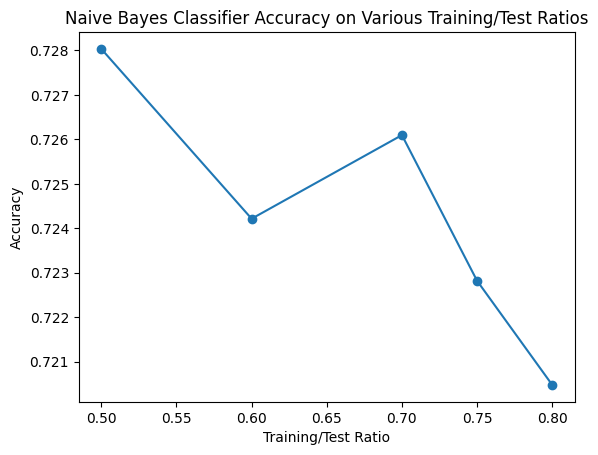

In [ ]:
#Create appropriate NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = data[['Alcohol_flag', 'Sugar_flag']]
y = data['Type']

# Create a function to train and evaluate the Naive Bayes classifier
def train_and_evaluate_classifier(X, y, test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Initialize the Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Train the classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = nb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Test various training/test ratios
ratios = [0.8, 0.75, 0.7, 0.6, 0.5]
accuracies = []

for ratio in ratios:
    accuracy = train_and_evaluate_classifier(X, y, test_size=1 - ratio)
    accuracies.append(accuracy)
    print(f"Accuracy for {int(ratio * 100)}-{int((1 - ratio) * 100)} split: {accuracy:.2f}")

# Plot the model accuracy measures
plt.plot(ratios, accuracies, marker='o')
plt.xlabel('Training/Test Ratio')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy on Various Training/Test Ratios')
plt.show()


# SUMMERY

In this analysis, I utilized Naïve Bayes classification to predict whether a wine is red or white based on alcohol and sugar content. I imported the dataset and prepared it. I employed techniques such as label encoding to transform categorical attributes into a machine-learning-friendly format. To understand the relationships between wine type and alcohol/sugar content, I constructed contingency tables and visually represented them through plots, facilitating a clearer understanding of data distribution. + Probability calculations. Naïve Bayes classifiers were implemented and evaluated on various training/test ratios, and the outcomes were visually presented to aid in selecting an optimal configuration.




